<a href="https://colab.research.google.com/github/muneebelahimalik/Vision-Language-A.I/blob/main/hybrid_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/mlfoundations/open_clip.git


  Cloning https://github.com/mlfoundations/open_clip.git to /tmp/pip-req-build-2odlyj97
  Running command git clone --filter=blob:none --quiet https://github.com/mlfoundations/open_clip.git /tmp/pip-req-build-2odlyj97
  Resolved https://github.com/mlfoundations/open_clip.git to commit bf5d49c112c82c738f7b34bde6e154760a711790
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 100.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


open_clip_model.safetensors:   0%|          | 0.00/718M [00:00<?, ?B/s]

open_clip_model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

Model 1 (convnext_base_w) parameters: 179,385,345
Model 2 (ViT-B-32) parameters: 151,277,313


100%|██████████| 26.4M/26.4M [00:01<00:00, 13.6MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 198kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.74MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 23.5MB/s]


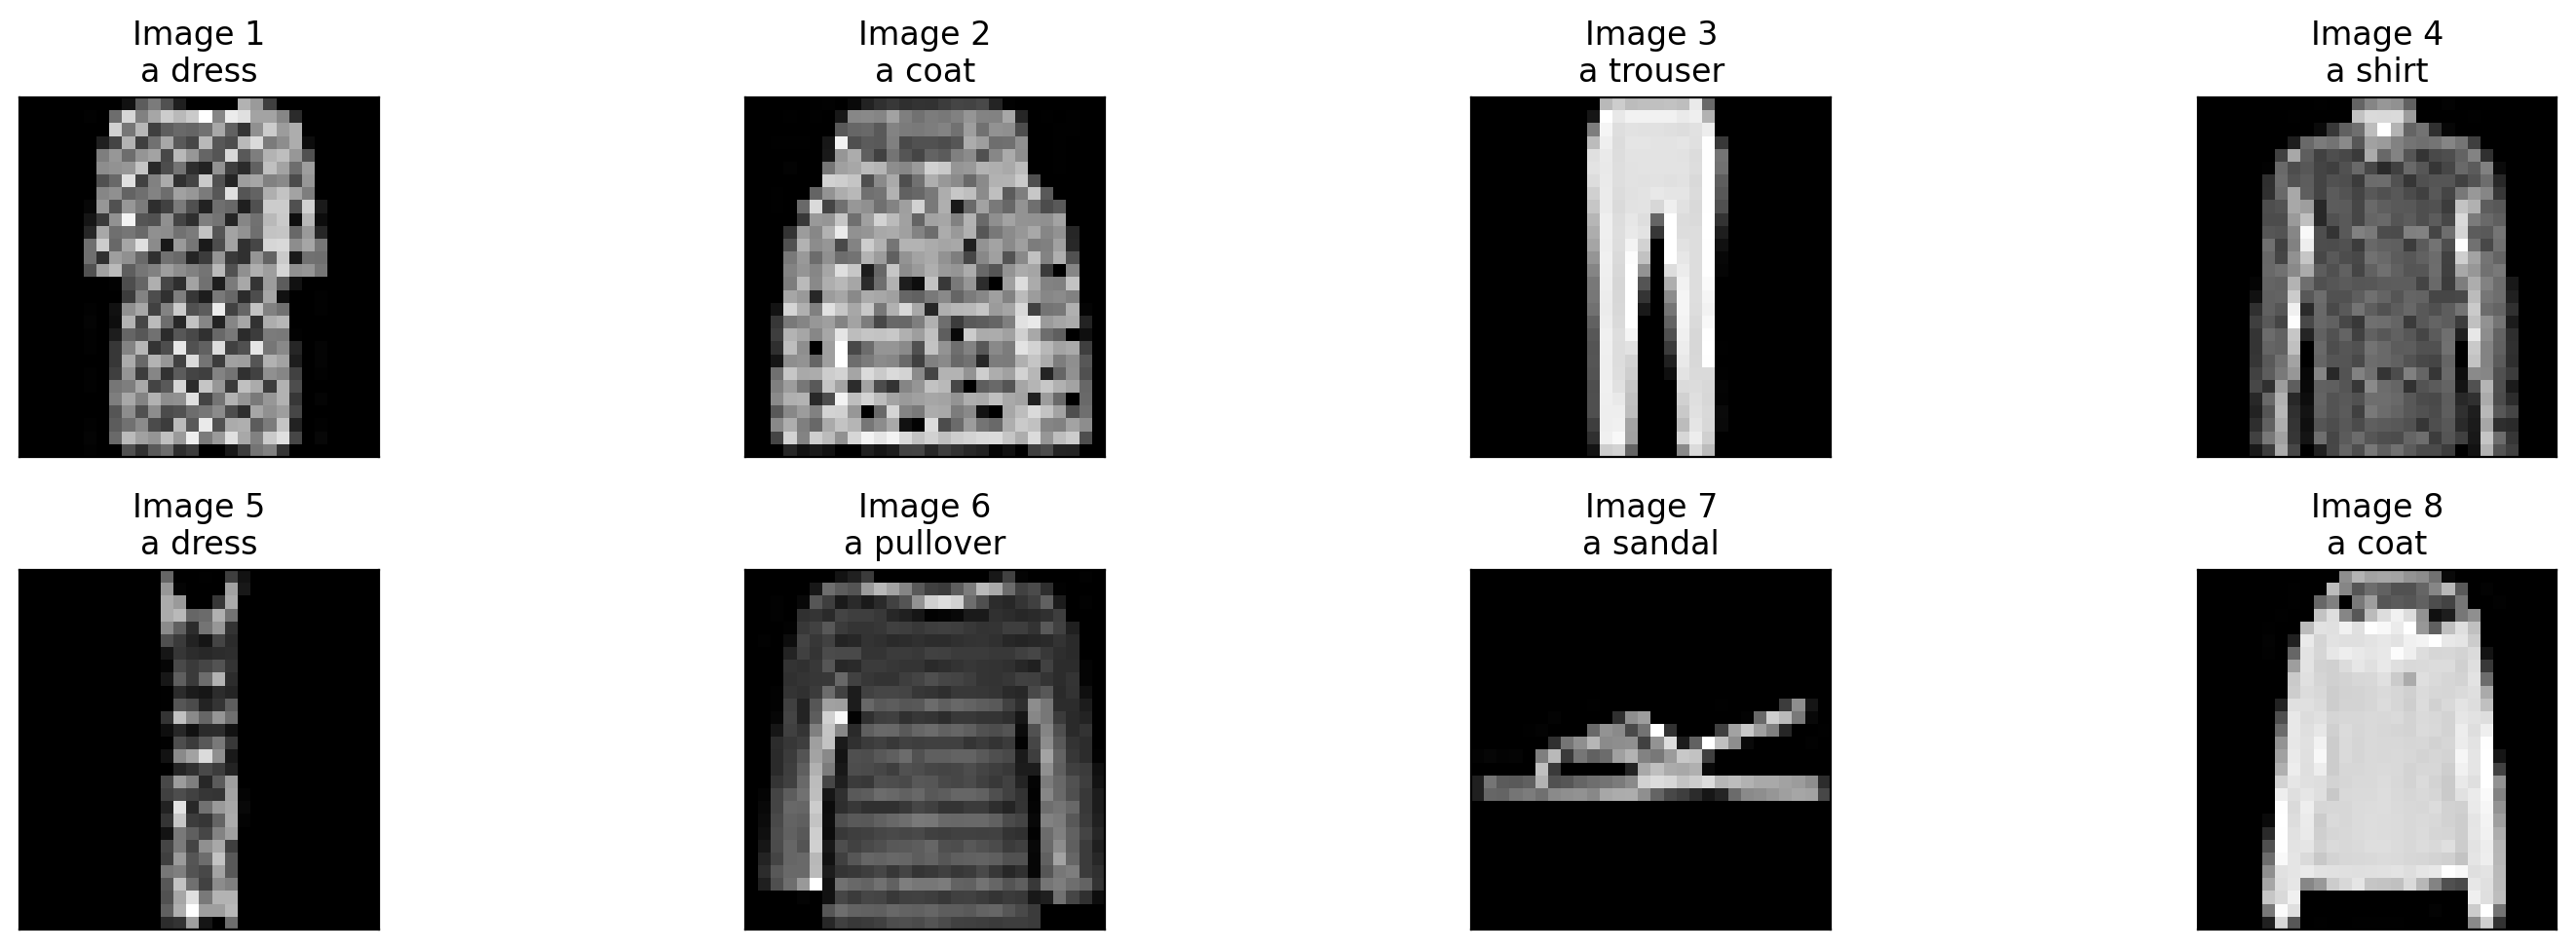

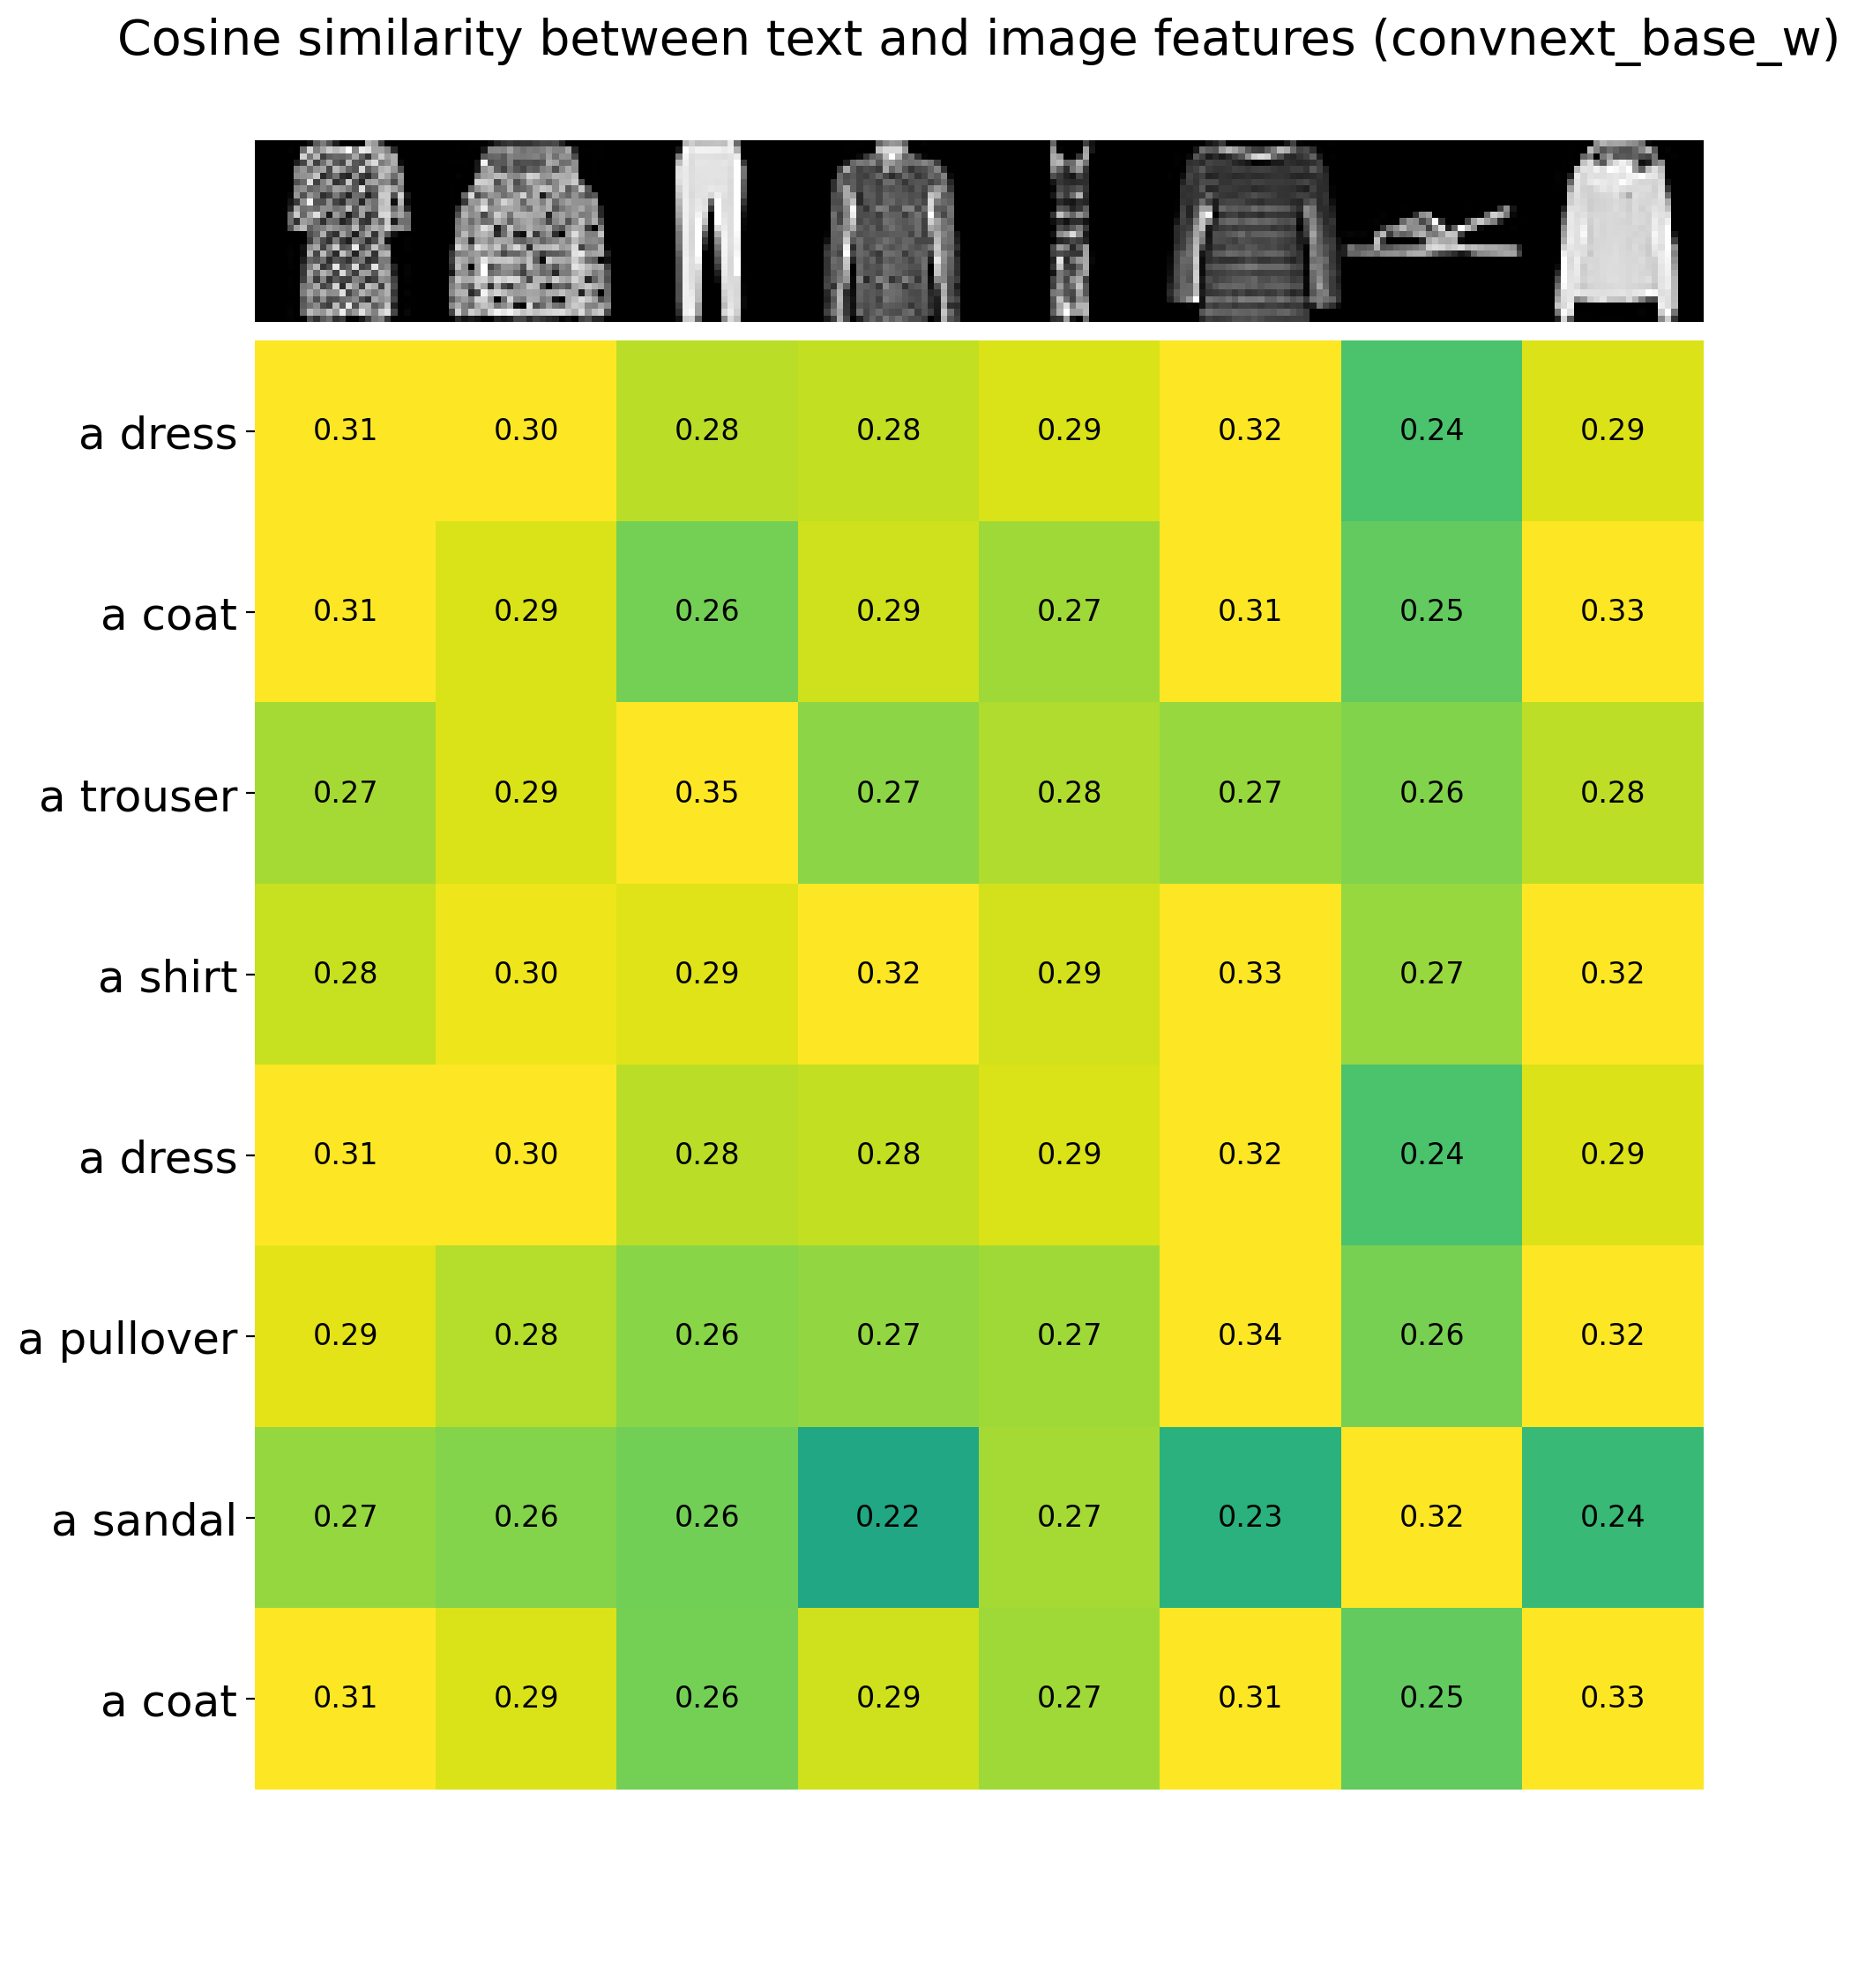

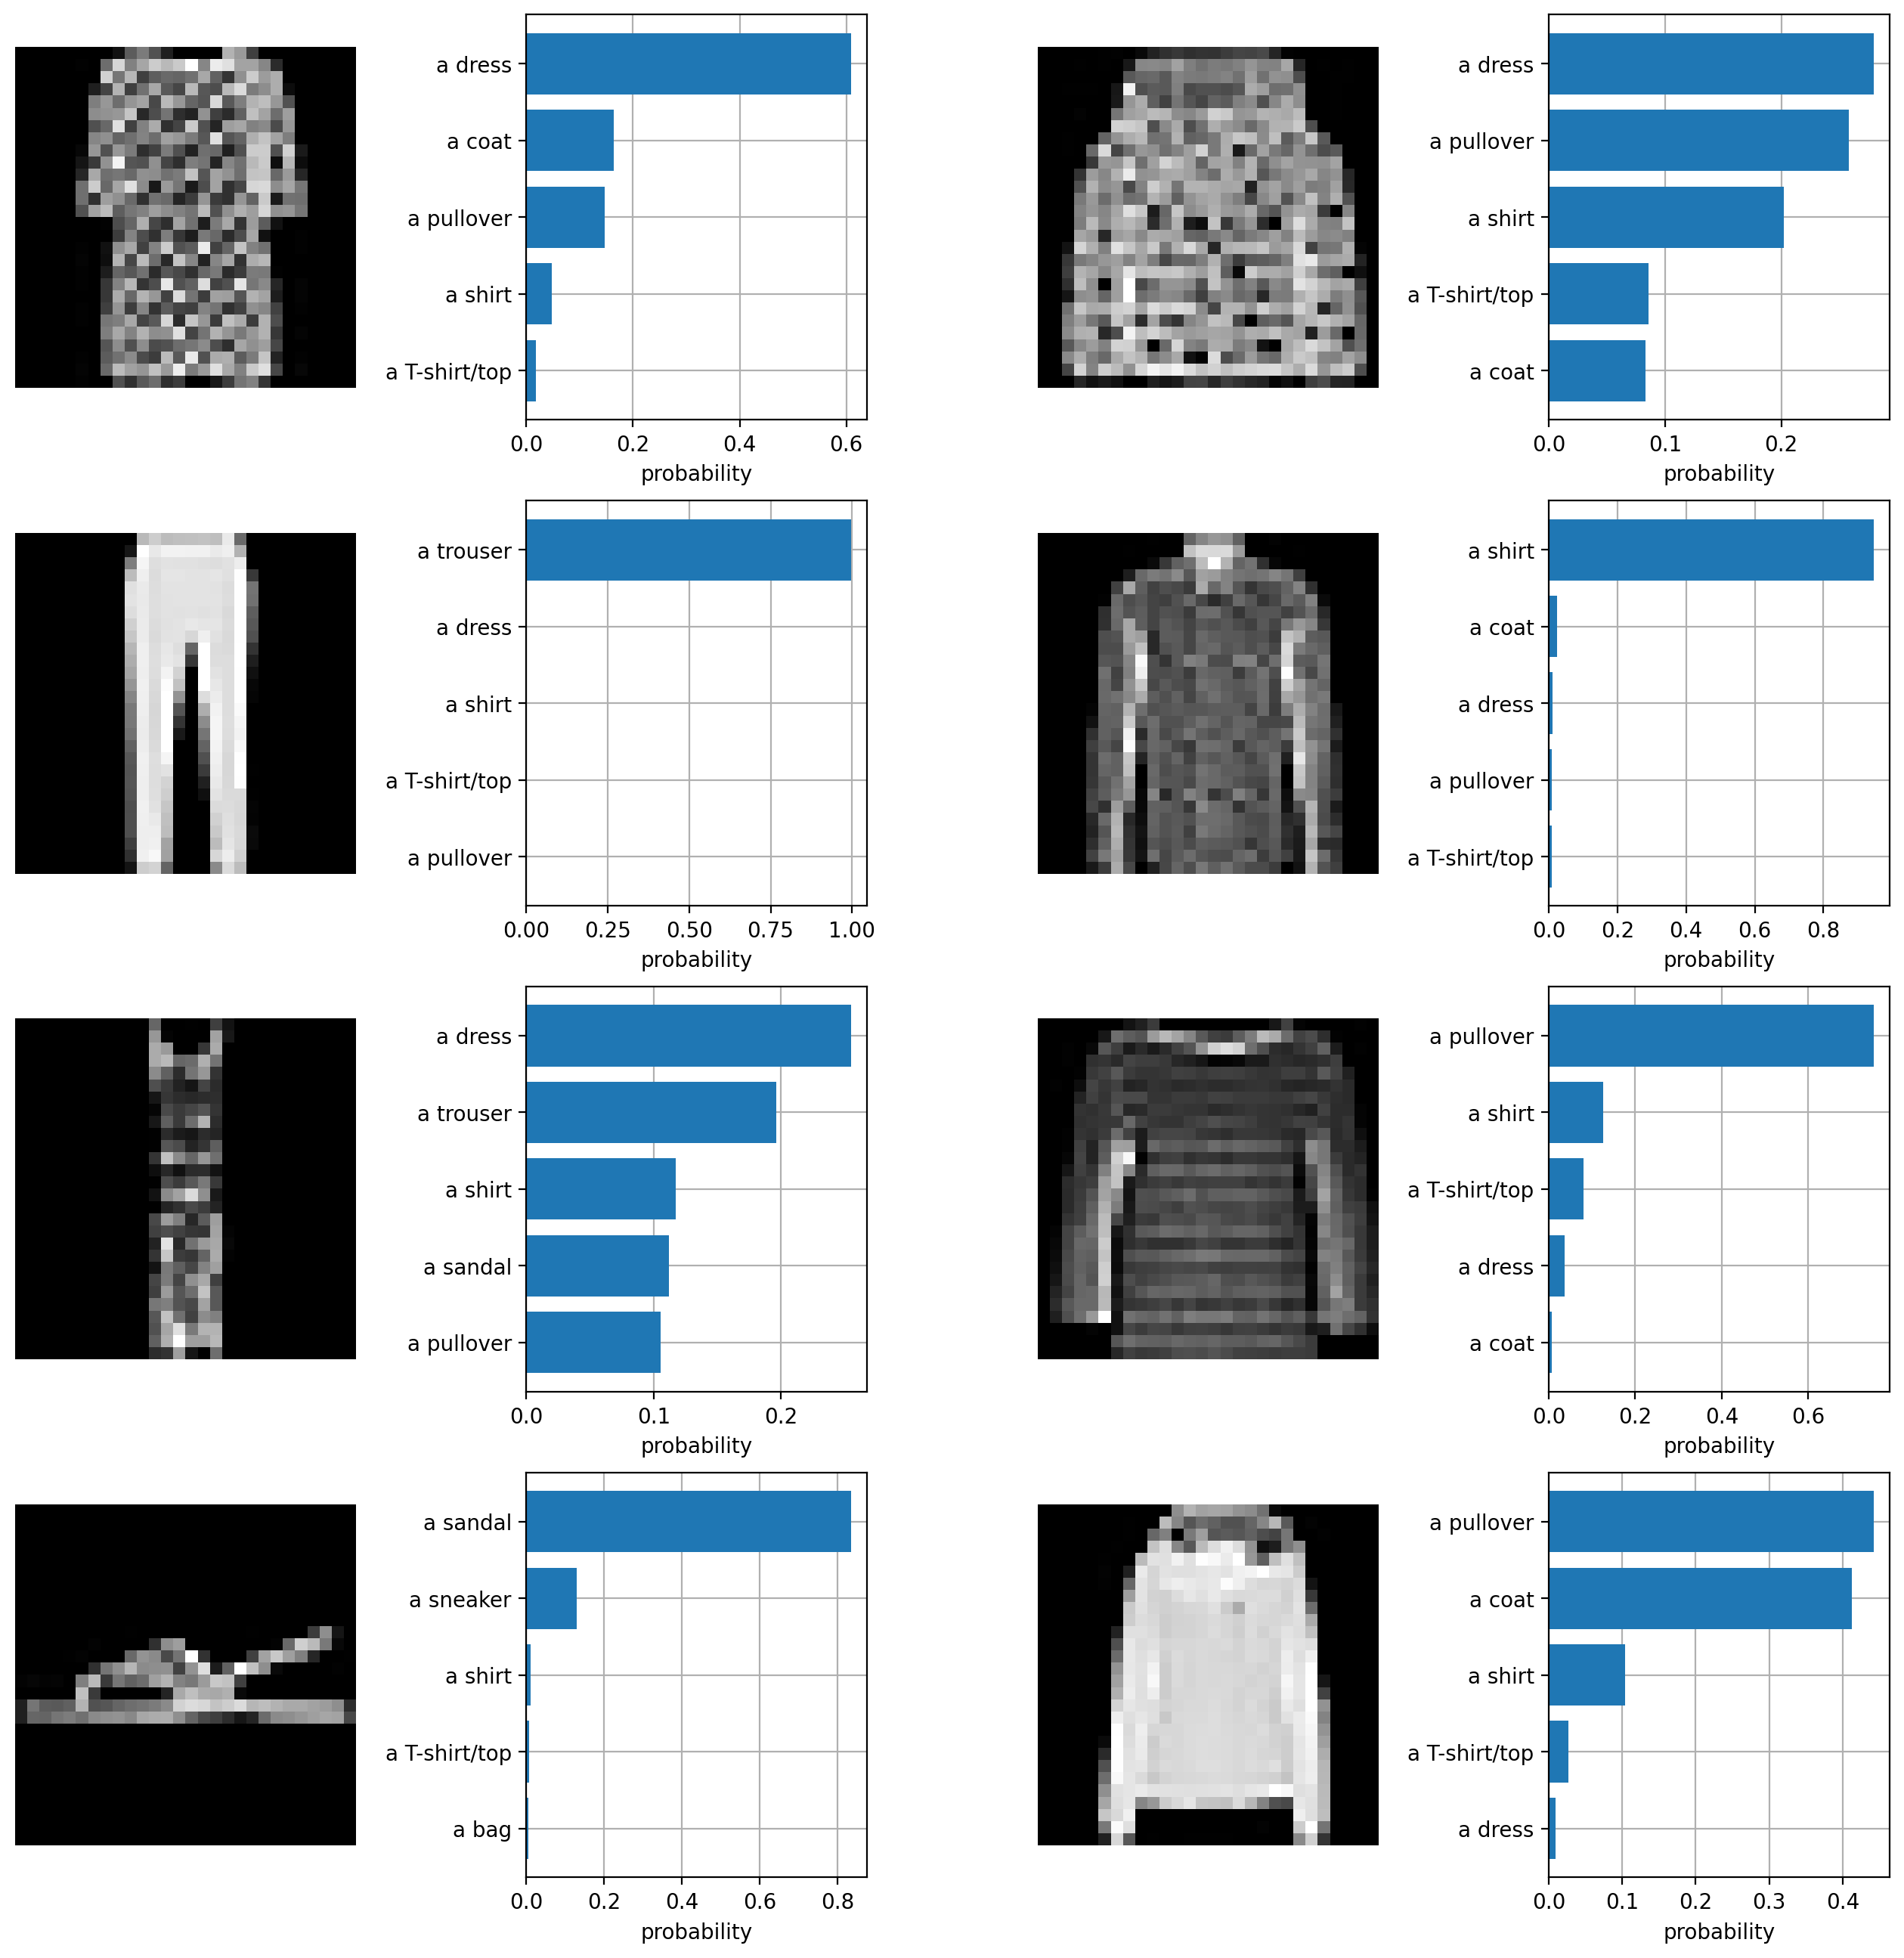

Processed batch 1/313
Processed batch 2/313
Processed batch 3/313
Processed batch 4/313
Processed batch 5/313
Processed batch 6/313
Processed batch 7/313
Processed batch 8/313
Processed batch 9/313
Processed batch 10/313
Processed batch 11/313
Processed batch 12/313
Processed batch 13/313
Processed batch 14/313
Processed batch 15/313
Processed batch 16/313
Processed batch 17/313
Processed batch 18/313
Processed batch 19/313
Processed batch 20/313
Processed batch 21/313
Processed batch 22/313
Processed batch 23/313
Processed batch 24/313
Processed batch 25/313
Processed batch 26/313
Processed batch 27/313
Processed batch 28/313
Processed batch 29/313
Processed batch 30/313
Processed batch 31/313
Processed batch 32/313
Processed batch 33/313
Processed batch 34/313
Processed batch 35/313
Processed batch 36/313
Processed batch 37/313
Processed batch 38/313
Processed batch 39/313
Processed batch 40/313
Processed batch 41/313
Processed batch 42/313
Processed batch 43/313
Processed batch 44/3

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""  # Disable GPU if needed
import open_clip
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
import torch
from torchvision.datasets import FashionMNIST
from torchvision import transforms
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load CLIP models
model1, _, preprocess1 = open_clip.create_model_and_transforms('convnext_base_w', pretrained='laion2b_s13b_b82k_augreg')
model2, _, preprocess2 = open_clip.create_model_and_transforms('ViT-B-32', pretrained='laion2b_s34b_b79k')
model1.eval()
model2.eval()
tokenizer1 = open_clip.get_tokenizer('convnext_base_w')
tokenizer2 = open_clip.get_tokenizer('ViT-B-32')

print("Model 1 (convnext_base_w) parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model1.parameters()]):,}")
print("Model 2 (ViT-B-32) parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model2.parameters()]):,}")

# Define Fashion-MNIST class descriptions
descriptions = {
    0: "a T-shirt/top",
    1: "a trouser",
    2: "a pullover",
    3: "a dress",
    4: "a coat",
    5: "a sandal",
    6: "a shirt",
    7: "a sneaker",
    8: "a bag",
    9: "an ankle boot"
}
class_names = list(descriptions.values())

# Load Fashion-MNIST test dataset
fashion_mnist = FashionMNIST(root="~/.cache", train=False, download=True)

# Preprocess images: Upsample, enhance contrast, convert to RGB
def preprocess_fashion_mnist(image, preprocess):
    image = image.resize((224, 224), Image.BICUBIC)  # Upsample to 224x224
    image = ImageEnhance.Contrast(image).enhance(1.5)  # Boost contrast
    image = image.convert("RGB")
    return preprocess(image)

# Visualize a subset of 8 images (using model1 for simplicity)
num_images_subset = 8
original_images = []
images1 = []
images2 = []
texts = []
indices = np.random.choice(len(fashion_mnist), num_images_subset, replace=False)

plt.figure(figsize=(16, 5))
for i, idx in enumerate(indices):
    image, label = fashion_mnist[idx]
    name = label
    plt.subplot(2, 4, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Image {i+1}\n{descriptions[name]}")
    plt.xticks([])
    plt.yticks([])

    original_images.append(image)
    images1.append(preprocess_fashion_mnist(image, preprocess1))
    images2.append(preprocess_fashion_mnist(image, preprocess2))
    texts.append(descriptions[name])

plt.tight_layout()

# Convert subset images to tensor
image_input1 = torch.stack(images1)
image_input2 = torch.stack(images2)

# Tokenize text descriptions for subset (using model1 for visualization)
text_descriptions = ["This is " + desc for desc in texts]
text_tokens = tokenizer1(text_descriptions)

# Compute image and text features for subset (model1)
with torch.no_grad():
    image_features = model1.encode_image(image_input1).float()
    text_features = model1.encode_text(text_tokens).float()

# Normalize features
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)

# Compute similarity for subset
similarity = text_features.cpu().numpy() @ image_features.cpu().numpy().T
count = len(texts)

# Plot similarity matrix
plt.figure(figsize=(20, 14))
plt.imshow(similarity, vmin=0.1, vmax=0.3)
plt.yticks(range(count), texts, fontsize=18)
plt.xticks([])
for i, image in enumerate(original_images):
    plt.imshow(image, cmap='gray', extent=(i - 0.5, i + 0.5, -1.6, -0.6), origin="lower")
for x in range(similarity.shape[1]):
    for y in range(similarity.shape[0]):
        plt.text(x, y, f"{similarity[y, x]:.2f}", ha="center", va="center", size=12)

for side in ["left", "top", "right", "bottom"]:
    plt.gca().spines[side].set_visible(False)

plt.xlim([-0.5, count - 0.5])
plt.ylim([count + 0.5, -2])
plt.title("Cosine similarity between text and image features (convnext_base_w)", size=20)

# Prompt ensembling for zero-shot classification
prompt_templates = [
    "A photo of {}",
    "A grayscale image of {}",
    "A fashion item: {}",
    "An image of {}"
]
text_descriptions = [tpl.format(desc) for desc in descriptions.values() for tpl in prompt_templates]

# Compute text features for both models
text_tokens1 = tokenizer1(text_descriptions)
text_tokens2 = tokenizer2(text_descriptions)
with torch.no_grad():
    text_features1 = model1.encode_text(text_tokens1).float()
    text_features1 /= text_features1.norm(dim=-1, keepdim=True)
    text_features1 = text_features1.reshape(10, len(prompt_templates), -1).mean(dim=1)
    text_features1 /= text_features1.norm(dim=-1, keepdim=True)

    text_features2 = model2.encode_text(text_tokens2).float()
    text_features2 /= text_features2.norm(dim=-1, keepdim=True)
    text_features2 = text_features2.reshape(10, len(prompt_templates), -1).mean(dim=1)
    text_features2 /= text_features2.norm(dim=-1, keepdim=True)

# Zero-shot classification for subset (for visualization, using ensemble)
with torch.no_grad():
    image_features1 = model1.encode_image(image_input1).float()
    image_features1 /= image_features1.norm(dim=-1, keepdim=True)
    image_features2 = model2.encode_image(image_input2).float()
    image_features2 /= image_features2.norm(dim=-1, keepdim=True)

text_probs1 = (100.0 * image_features1 @ text_features1.T).softmax(dim=-1)
text_probs2 = (100.0 * image_features2 @ text_features2.T).softmax(dim=-1)
text_probs = (text_probs1 + text_probs2) / 2
top_probs, top_labels = text_probs.cpu().topk(5, dim=-1)

# Plot classification results for subset
plt.figure(figsize=(16, 16))
for i, image in enumerate(original_images):
    plt.subplot(4, 4, 2 * i + 1)
    plt.imshow(image, cmap='gray')
    plt.axis("off")

    plt.subplot(4, 4, 2 * i + 2)
    y = np.arange(top_probs.shape[-1])
    plt.grid()
    plt.barh(y, top_probs[i])
    plt.gca().invert_yaxis()
    plt.gca().set_axisbelow(True)
    plt.yticks(y, [class_names[index] for index in top_labels[i].numpy()])
    plt.xlabel("probability")

plt.subplots_adjust(wspace=0.5)
plt.show()

# Process the entire test set for accuracy
batch_size = 32  # Reduced due to two models
num_images = len(fashion_mnist)
all_top1_preds = []
all_top5_preds = []
all_labels = []

for i in range(0, num_images, batch_size):
    batch_indices = range(i, min(i + batch_size, num_images))
    images1 = []
    images2 = []
    labels = []

    for idx in batch_indices:
        image, label = fashion_mnist[idx]
        images1.append(preprocess_fashion_mnist(image, preprocess1))
        images2.append(preprocess_fashion_mnist(image, preprocess2))
        labels.append(label)

    image_input1 = torch.stack(images1)
    image_input2 = torch.stack(images2)
    labels = torch.tensor(labels)

    with torch.no_grad():
        image_features1 = model1.encode_image(image_input1).float()
        image_features1 /= image_features1.norm(dim=-1, keepdim=True)
        image_features2 = model2.encode_image(image_input2).float()
        image_features2 /= image_features2.norm(dim=-1, keepdim=True)

    text_probs1 = (100.0 * image_features1 @ text_features1.T).softmax(dim=-1)
    text_probs2 = (100.0 * image_features2 @ text_features2.T).softmax(dim=-1)
    text_probs = (text_probs1 + text_probs2) / 2
    top_probs, top_labels = text_probs.cpu().topk(5, dim=-1)
    all_top1_preds.append(top_labels[:, 0])
    all_top5_preds.append(top_labels)
    all_labels.append(labels)
    print(f"Processed batch {i//batch_size + 1}/{num_images//batch_size + 1}")

# Concatenate results
all_top1_preds = torch.cat(all_top1_preds).numpy()
all_top5_preds = torch.cat(all_top5_preds).numpy()
all_labels = torch.cat(all_labels).numpy()

# Compute top-1 and top-5 accuracy
top1_correct = (all_top1_preds == all_labels).sum()
top1_accuracy = top1_correct / num_images * 100
top5_correct = np.array([all_labels[i] in all_top5_preds[i] for i in range(num_images)]).sum()
top5_accuracy = top5_correct / num_images * 100

print(f"Top-1 Accuracy: {top1_accuracy:.2f}% ({top1_correct}/{num_images})")
print(f"Top-5 Accuracy: {top5_accuracy:.2f}% ({top5_correct}/{num_images})")
